## import necessary libraries

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split

## 讀檔 Breast Cancer.csv

In [2]:
df = pd.read_csv('BreastCancer.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

## (a)切分 feature= radius_mean, area_mean label = diagnosis

In [0]:
x = df.loc[:,["radius_mean","area_mean"]]
y = df.loc[:,['diagnosis']]

##(b)切分  資料及訓練集

In [0]:
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.34, random_state = 5)

## (c)做個knn吧

In [5]:
from sklearn.neighbors import KNeighborsClassifier as KNN

clf = KNN(n_neighbors = 6).fit(train_X ,train_y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


## (d)算個精準度 0.91好像還不錯欸

In [6]:
predicted_results = clf.predict(test_X)
accuracy_test = metrics.accuracy_score(predicted_results, test_y)
print('accuracy: ',accuracy_test)

accuracy:  0.9175257731958762


## (e)用matplotlib 
x = radius_mean<br>
y = are_mean<br>
 c= label = y['diagnosis']

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `matplotlib.transforms.Bbox`
  clip_on: bool
  clip_path: { (`.path.Path`, `.transforms.Transform`), `.patches.Patch`, None } 
  color: color
  contains: callable
  figure: `.Figure`
  fontfamily: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties: `.font_manager.FontProperties`
  fontsize: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle: {'normal', 'italic', 'oblique'}
  fontvariant: {'n

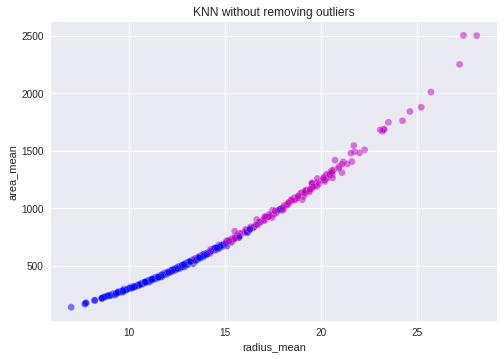

In [7]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('axes',edgecolor='w')
title_1 = plt.title('KNN without removing outliers')
plt.setp(title_1)
#title_1.setcolor("white")
#plt.tick_params(axis='x', colors='white')
#plt.tick_params(axis='y', colors='white')
#plt.ylabel.label.set_color("red")
label_x = plt.xlabel("radius_mean")
#label_x.set_color("white")

label_y = plt.ylabel("area_mean")
#label_y.set_color("white")

plt.scatter(x['radius_mean'],x['area_mean'], c = y['diagnosis'], alpha = 0.5, edgecolor= 'w')

#plt.xlabel('radius_mean')
#plt.ylabel('area_mean')
plt.show()

## (f) 做一下kmeans

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)



## (g) 這個時候來點fit_predict，又fit又predict，找出cluster

In [0]:
kmeans_cluster = kmeans.fit_predict(x)

## (h)matplotlib再度出動來畫畫圖，這次來看看cluster的分類畫得如何

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `matplotlib.transforms.Bbox`
  clip_on: bool
  clip_path: { (`.path.Path`, `.transforms.Transform`), `.patches.Patch`, None } 
  color: color
  contains: callable
  figure: `.Figure`
  fontfamily: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties: `.font_manager.FontProperties`
  fontsize: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle: {'normal', 'italic', 'oblique'}
  fontvariant: {'n

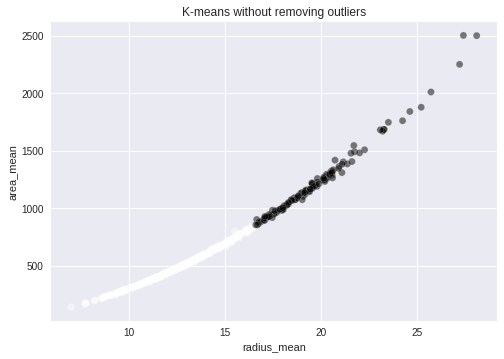

In [10]:
import matplotlib
import matplotlib.pyplot as plt

title_2 = plt.title('K-means without removing outliers')
plt.setp(title_2)
#matplotlib.rc('axes',edgecolor='w')
#plt.tick_params(axis='x', colors='white')
#plt.tick_params(axis='y', colors='white')
#plt.ylabel.label.set_color("red")
label_x_2 = plt.xlabel("radius_mean")
#label_x_2.set_color("white")

label_y_2 = plt.ylabel("area_mean")
#label_y_2.set_color("white")

plt.scatter(x['radius_mean'],x['area_mean'], c = kmeans_cluster, alpha = 0.5, edgecolor= 'w')


plt.show()

## (i)移除比2000大的，就是留下比2000小的意思啦

In [0]:
# ro = remove outlier
df_ro =  df[(df['area_mean']<2000)]


## (h-a) 就是重做一遍a-e的a 重切feature and labels

In [0]:
x_ros = df_ro.loc[:,['radius_mean','area_mean']]
y_ros = df_ro.loc[:,['diagnosis']]

## (h-b) 再做一次train test切

In [0]:
train_X_ros, test_X_ros, train_y_ros, test_y_ros = train_test_split(x_ros, y_ros, test_size = 0.34, random_state = 5)

## (h-c) 在一次knn喔 這次移除離群值版

In [14]:
from sklearn.neighbors import KNeighborsClassifier as KNN

clf_ros = KNN(n_neighbors = 6).fit(train_X_ros ,train_y_ros)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


## (h-d) 結果一掉之後accuracy居然有掉落
somehow覺得我可能有做錯

In [15]:
predicted_results = clf.predict(test_X_ros)
accuracy_test = metrics.accuracy_score(predicted_results, test_y_ros)
print('accuracy: ',accuracy_test)

accuracy:  0.9015544041450777


## (h-e) 這個圖再次上演，我覺得分類做的沒有之前好

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `matplotlib.transforms.Bbox`
  clip_on: bool
  clip_path: { (`.path.Path`, `.transforms.Transform`), `.patches.Patch`, None } 
  color: color
  contains: callable
  figure: `.Figure`
  fontfamily: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties: `.font_manager.FontProperties`
  fontsize: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle: {'normal', 'italic', 'oblique'}
  fontvariant: {'n

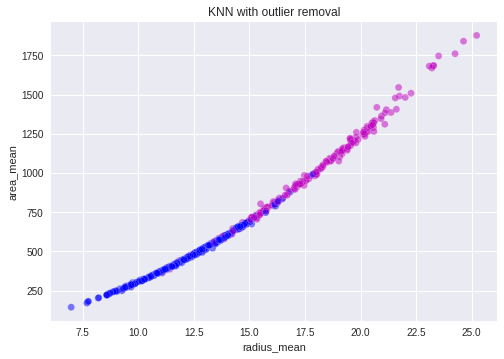

In [16]:
title_1 = plt.title('KNN with outlier removal')
plt.setp(title_1)

#plt.tick_params(axis='x', colors='white')
#plt.tick_params(axis='y', colors='white')
#plt.ylabel.label.set_color("red")
label_x_2 = plt.xlabel("radius_mean")
#label_x_2.set_color("white")

label_y_2 = plt.ylabel("area_mean")
#label_y_2.set_color("white")

plt.scatter(x_ros['radius_mean'],x_ros['area_mean'], c = y_ros['diagnosis'], alpha = 0.5, edgecolor= 'w')


plt.show()